<a href="https://colab.research.google.com/github/sanikeit/Image-classification-using-CNN/blob/main/Classic_cifar10_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os

import numpy as np

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report
import itertools

%matplotlib inline

In [ ]:
batch_size = 128  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 10
data_augmentation = False

In [ ]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 4s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


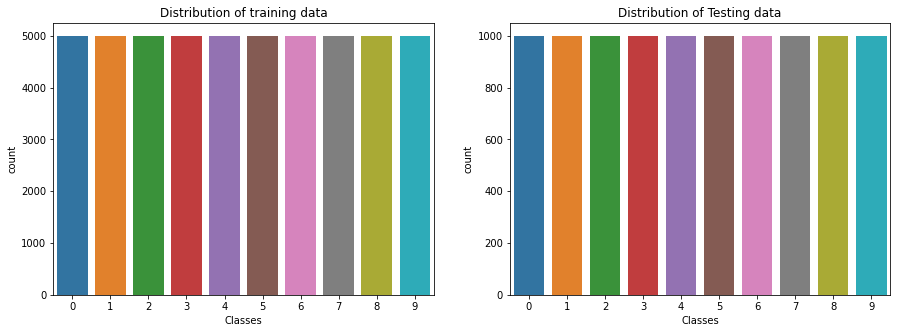

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

In [ ]:
from keras.utils import np_utils

# Normalize the data. Before we need to connvert data type to float for computation.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = 'SAME', input_shape = x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding = 'SAME'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                        

In [ ]:
from tensorflow import keras
from keras import optimizers

opt = keras.optimizers.Adam(learning_rate = 0.001)

model.compile(loss = 'categorical_crossentropy',
             optimizer = opt,
             metrics = ['accuracy'])

In [ ]:
history = None  # For recording the history of training process.
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True)


Epoch 1/10
391/391 [==============================] - 22s 26ms/step - loss: 1.6141 - accuracy: 0.4082 - val_loss: 1.2797 - val_accuracy: 0.5460
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 1.2154 - accuracy: 0.5654 - val_loss: 1.0647 - val_accuracy: 0.6270
Epoch 3/10
391/391 [==============================] - 9s 24ms/step - loss: 1.0441 - accuracy: 0.6320 - val_loss: 0.9118 - val_accuracy: 0.6790
Epoch 4/10
391/391 [==============================] - 9s 24ms/step - loss: 0.9387 - accuracy: 0.6708 - val_loss: 0.8299 - val_accuracy: 0.7081
Epoch 5/10
391/391 [==============================] - 9s 24ms/step - loss: 0.8513 - accuracy: 0.7004 - val_loss: 0.7995 - val_accuracy: 0.7207
Epoch 6/10
391/391 [==============================] - 9s 24ms/step - loss: 0.7913 - accuracy: 0.7219 - val_loss: 0.7571 - val_accuracy: 0.7335
Epoch 7/10
391/391 [==============================] - 10s 24ms/step - loss: 0.7440 - accuracy: 0.7398 - val_loss: 0.6995 - val_accuracy: 0.7

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


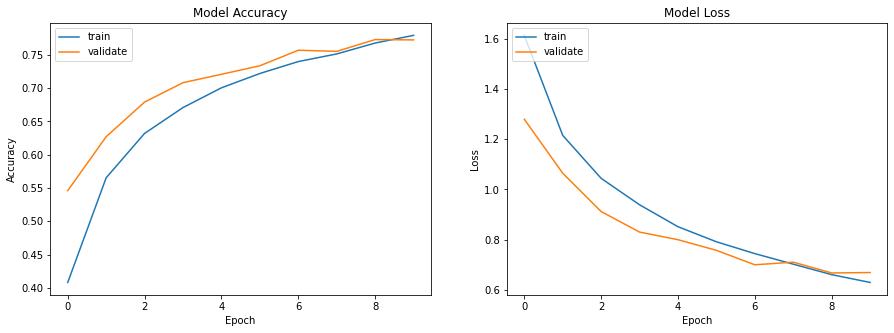

In [ ]:
def plotmodelhistory(history):
    fig, ax = plt.subplots(1, 2, figsize = (15, 5))
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['train', 'validate'], loc = 'upper left')
    
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'validate'], loc = 'upper left')
    plt.show()
    
print(history.history.keys())

plotmodelhistory(history)

In [ ]:
scores = model.evaluate(x_test, y_test, verbose = 1)
print('Test loss : ', scores[0])
print('Test accuracy : ', scores[1])

pred = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.6687 - accuracy: 0.7723
Test loss :  0.6687194108963013
Test accuracy :  0.7723000049591064


In [ ]:
def heatmap(data, row_labels, col_labels, ax = None, cbar_kw = {}, cbarlabel = '', **kwargs):
    
    if not ax:
        ax = plt.gca()
    im = ax.imshow(data, **kwargs)
    
    cbar = ax.figure.colorbar(im, ax= ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation = -90, va = 'bottom')
    
    ax.tick_params(top = True, bottom = False, labeltop = True, labelbottom = False)
    

    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)
    
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    return im, cbar

def annotate_heatmap(im, data = None, fmt = 'd', threshold = None):
    
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            text = im.axes.text(j, i, format(data[i, j], fmt), horizontalalignment = 'center',
                               color = 'white' if data[i, j] > thresh else 'black')
            
            texts.append(text)
            
    return texts

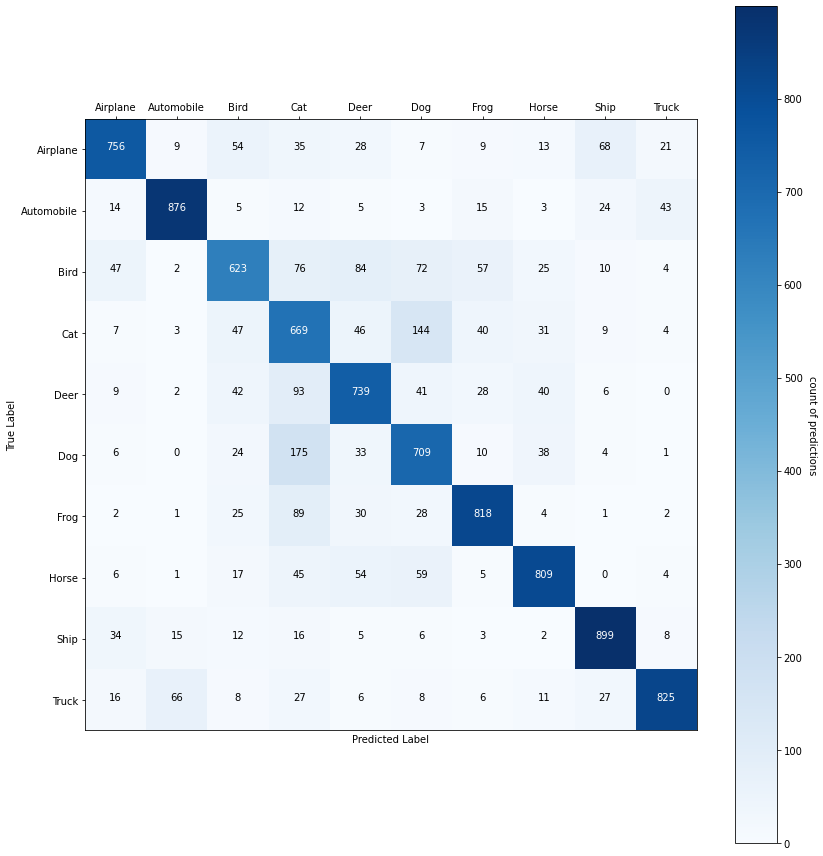

In [ ]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

y_pred_classes = np.argmax(pred, axis = 1)
y_true = np.argmax(y_test, axis = 1)
errors = (y_pred_classes - y_true != 0)

y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

cm = confusion_matrix(y_true, y_pred_classes)
thresh = cm.max() / 2,

fig, ax = plt.subplots(figsize = (12, 12))
im, cbar = heatmap(cm, labels, labels, ax = ax,
                  cmap = plt.cm.Blues, cbarlabel = 'count of predictions')

texts = annotate_heatmap(im, data = cm, threshold = thresh)

fig.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1000
           1       0.90      0.88      0.89      1000
           2       0.73      0.62      0.67      1000
           3       0.54      0.67      0.60      1000
           4       0.72      0.74      0.73      1000
           5       0.66      0.71      0.68      1000
           6       0.83      0.82      0.82      1000
           7       0.83      0.81      0.82      1000
           8       0.86      0.90      0.88      1000
           9       0.90      0.82      0.86      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



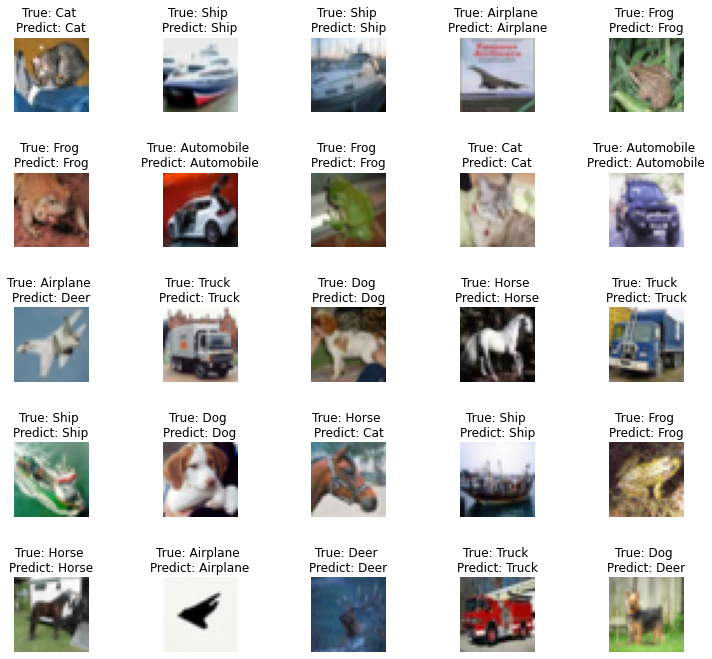

In [ ]:
R = 5
C = 5
fig, axes = plt.subplots(R, C, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, R*C):
    axes[i].imshow(x_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[i]], labels[y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

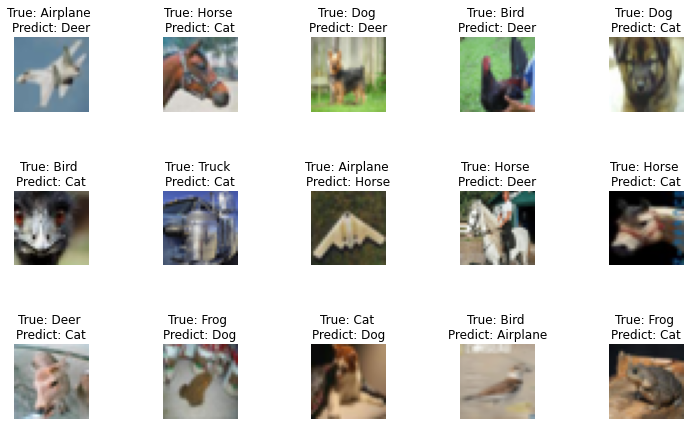

In [ ]:
R = 3
C = 5
fig, axes = plt.subplots(R, C, figsize = (12, 8))
axes = axes.ravel()

misclassified_idx = np.where(y_pred_classes != y_true)[0]
for i in np.arange(0, R*C):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_true[misclassified_idx[i]]], 
                                                  labels[y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace = 1)

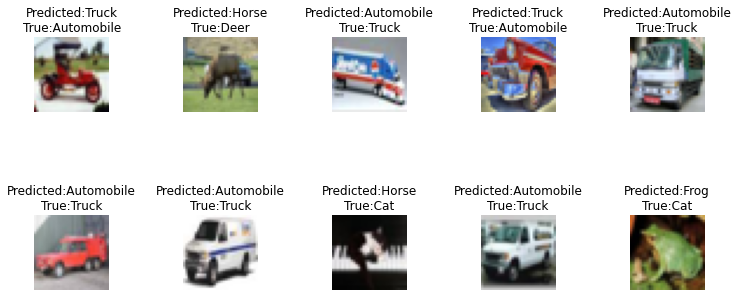

In [ ]:
def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    n = 0
    nrows = 2
    ncols = 5
    fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = True, figsize = (12, 6))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row, col].imshow((img_errors[error]).reshape((32, 32, 3)))
            ax[row, col].set_title('Predicted:{}\nTrue:{}'.
                                  format(labels[pred_errors[error]], labels[obs_errors[error]]))
            n += 1
            ax[row, col].axis('off')
            plt.subplots_adjust(wspace = 1)
        
y_pred_errors_prob = np.max(y_pred_errors, axis = 1)
true_prob_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
delta_pred_true_errors = y_pred_errors_prob - true_prob_errors

sorted_dela_errors = np.argsort(delta_pred_true_errors)

most_important_errors = sorted_dela_errors[-10:]

display_errors(most_important_errors, x_test_errors, y_pred_classes_errors, y_true_errors)

In [ ]:
def show_test(number):
    fig = plt.figure(figsize = (3, 3))
    test_image = np.expand_dims(x_test[number], axis = 0)
    test_prob = model.predict(test_image, verbose = 0)
    test_result = test_prob.argmax(axis = -1)
    plt.imshow(x_test[number])
    dict_key = test_result[0]
    plt.title('Predicted : {} \nTrue Label : {}'.format(labels[dict_key],
                                                       labels[y_true[number]]))

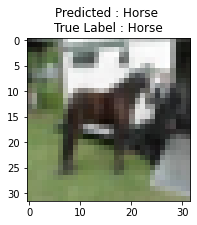

In [ ]:
show_test(20)

## Next Steps  
We will add image noise correction  
Complex CNN models
1. LeNet
2. ResNet
3. Unet  
and compare the above 3